In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
results = pd.read_csv('results.csv', names = ['result_id', 'race_id', 'driver_id', 'constructor_id', 'number', 'grid', 'position', 'position_text', 'position_order', 'points', 'laps', 'time', 'milliseconds', 'fastest_lap', 'rank', 'fastest_lap_time', 'fastest_lap_speed', 'status_id'], header = None)
races = pd.read_csv('races.csv', names = ['race_id', 'year', 'round', 'circuit_id', 'name', 'date', 'time', 'url', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18'], header = None)
driver = pd.read_csv('drivers.csv', names = ['driver_id', 'driver_ref', 'number', 'code', 'forename', 'surname', 'dob', 'nationality', 'url'], header = None)
constructors = pd.read_csv('constructors.csv', names = ['constructor_id', 'constructor_ref', 'name', 'nationality', 'url'], header = None)

In [3]:
df = pd.merge(results, races[['race_id', 'year', 'name', 'round']], on = 'race_id', how = 'left')
df = pd.merge(df, driver[['driver_id', 'driver_ref', 'nationality']], on = 'driver_id', how = 'left')
df = pd.merge(df, constructors[['constructor_id', 'name', 'nationality']], on = 'constructor_id', how = 'left')


In [4]:
print(df)

      result_id race_id driver_id constructor_id  number  grid  position  \
0      resultId  raceId  driverId  constructorId  number  grid  position   
1             1      18         1              1      22     1         1   
2             2      18         2              2       3     5         2   
3             3      18         3              3       7     7         3   
4             4      18         4              4       5    11         4   
...         ...     ...       ...            ...     ...   ...       ...   
25616     25621    1084       852            213      22    14        16   
25617     25622    1084        20            117       5    20        17   
25618     25623    1084       832              6      55     3        \N   
25619     25624    1084       849              3       6    19        \N   
25620     25625    1084       815              9      11    13        \N   

      position_text position_order  points  ... fastest_lap_time  \
0      positionText

In [5]:
df.drop(['number', 'position', 'position_text', 'laps', 'fastest_lap', 'status_id', 'result_id', 'race_id', 'driver_id', 'constructor_id'], axis=1, inplace = True)


In [6]:
df.rename(columns = {'rank':'fastest_lap_rank', 'name_x': 'gp_name', 'nationality_x': 'driver_nationality', 'name_y': 'constructor_name', 'nationality_y':'constructor_nationality', 'driver_ref': 'driver'}, inplace = True)

In [7]:
print(df)


       grid position_order  points         time  milliseconds  \
0      grid  positionOrder  points         time  milliseconds   
1         1              1      10  1:34:50.616       5690616   
2         5              2       8       +5.478       5696094   
3         7              3       6       +8.163       5698779   
4        11              4       5      +17.181       5707797   
...     ...            ...     ...          ...           ...   
25616    14             16       0           \N            \N   
25617    20             17       0           \N            \N   
25618     3             18       0           \N            \N   
25619    19             19       0           \N            \N   
25620    13             20       0           \N            \N   

      fastest_lap_rank fastest_lap_time fastest_lap_speed  year  \
0                 rank   fastestLapTime   fastestLapSpeed  year   
1                    2         1:27.452           218.300  2008   
2                 

In [8]:
df = df[['year', 'gp_name', 'round', 'driver', 'constructor_name', 'grid', 'position_order', 'points', 'time', 'milliseconds', 'fastest_lap_rank', 'fastest_lap_time', 'fastest_lap_speed', 'driver_nationality', 'constructor_nationality']]

In [9]:
df2019 = df[df['year']!='2019']

In [10]:
print(df2019)

       year                gp_name  round     driver constructor_name  grid  \
0      year                   name  round  driverRef             name  grid   
1      2008  Australian Grand Prix      1   hamilton          McLaren     1   
2      2008  Australian Grand Prix      1   heidfeld       BMW Sauber     5   
3      2008  Australian Grand Prix      1    rosberg         Williams     7   
4      2008  Australian Grand Prix      1     alonso          Renault    11   
...     ...                    ...    ...        ...              ...   ...   
25616  2022    Austrian Grand Prix     11    tsunoda       AlphaTauri    14   
25617  2022    Austrian Grand Prix     11     vettel     Aston Martin    20   
25618  2022    Austrian Grand Prix     11      sainz          Ferrari     3   
25619  2022    Austrian Grand Prix     11     latifi         Williams    19   
25620  2022    Austrian Grand Prix     11      perez         Red Bull    13   

      position_order  points         time  millisec

In [11]:
df2019 = df2019.sort_values(by = ['year', 'round', 'position_order'], ascending = [False, True, True])

In [12]:
df2019.time.replace('\\N', np.nan, inplace=True)
df2019.milliseconds.replace('\\N', np.nan, inplace = True)
df2019.fastest_lap_rank.replace('\\N', np.nan, inplace = True)
df2019.fastest_lap_time.replace('\\N', np.nan, inplace = True)
df2019.fastest_lap_speed.replace('\\N', np.nan, inplace = True)



In [13]:
df2019 = df2019.iloc[1::]

In [14]:
print(df2019)

       year             gp_name round           driver constructor_name grid  \
25401  2022  Bahrain Grand Prix     1          leclerc          Ferrari    1   
25410  2022  Bahrain Grand Prix     1             zhou       Alfa Romeo   15   
25411  2022  Bahrain Grand Prix     1  mick_schumacher     Haas F1 Team   12   
25412  2022  Bahrain Grand Prix     1           stroll     Aston Martin   19   
25413  2022  Bahrain Grand Prix     1            albon         Williams   14   
...     ...                 ...   ...              ...              ...  ...   
20154  1950  Italian Grand Prix     7        etancelin      Talbot-Lago   16   
20155  1950  Italian Grand Prix     7      graffenried         Maserati   17   
20156  1950  Italian Grand Prix     7        whitehead          Ferrari   18   
20157  1950  Italian Grand Prix     7           murray         Maserati   24   
20158  1950  Italian Grand Prix     7         harrison              ERA   21   

      position_order points         tim

In [15]:
df2019.fastest_lap_speed = df2019.fastest_lap_speed.astype(float)
df2019.fastest_lap_rank = df2019.fastest_lap_rank.astype(float)
df2019.milliseconds = df2019.milliseconds.astype(float)

In [16]:
df2019.position_order = df2019.position_order.astype(int)

In [17]:
df2019.reset_index(drop=True, inplace=True)

In [18]:
df2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25200 entries, 0 to 25199
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   year                     25200 non-null  object 
 1   gp_name                  25200 non-null  object 
 2   round                    25200 non-null  object 
 3   driver                   25200 non-null  object 
 4   constructor_name         25200 non-null  object 
 5   grid                     25200 non-null  object 
 6   position_order           25200 non-null  int32  
 7   points                   25200 non-null  object 
 8   time                     6746 non-null   object 
 9   milliseconds             6745 non-null   float64
 10  fastest_lap_rank         6951 non-null   float64
 11  fastest_lap_time         6750 non-null   object 
 12  fastest_lap_speed        6750 non-null   float64
 13  driver_nationality       25200 non-null  object 
 14  constructor_nationalit

In [19]:
df2019.head(10)

,year,gp_name,round,driver,constructor_name,grid,position_order,points,time,milliseconds,fastest_lap_rank,fastest_lap_time,fastest_lap_speed,driver_nationality,constructor_nationality
0,2022,Bahrain Grand Prix,1,leclerc,Ferrari,1,1,26,1:37:33.584,5853584.0,1.0,1:34.570,206.018,Monegasque,Italian
1,2022,Bahrain Grand Prix,1,zhou,Alfa Romeo,15,10,1,+23.064,5876648.0,9.0,1:36.685,201.512,Chinese,Swiss
2,2022,Bahrain Grand Prix,1,mick_schumacher,Haas F1 Team,12,11,0,+32.574,5886158.0,11.0,1:36.956,200.948,German,American
3,2022,Bahrain Grand Prix,1,stroll,Aston Martin,19,12,0,+45.873,5899457.0,15.0,1:37.146,200.555,Canadian,British
4,2022,Bahrain Grand Prix,1,albon,Williams,14,13,0,+53.932,5907516.0,18.0,1:37.355,200.125,Thai,British
5,2022,Bahrain Grand Prix,1,ricciardo,McLaren,18,14,0,+54.975,5908559.0,16.0,1:37.261,200.318,Australian,British
6,2022,Bahrain Grand Prix,1,norris,McLaren,13,15,0,+56.335,5909919.0,12.0,1:36.988,200.882,British,British
7,2022,Bahrain Grand Prix,1,latifi,Williams,20,16,0,+1:01.795,5915379.0,20.0,1:38.251,198.300,Canadian,British
8,2022,Bahrain Grand Prix,1,hulkenberg,Aston Martin,17,17,0,+1:03.829,5917413.0,19.0,1:38.201,198.401,German,British
9,2022,Bahrain Grand Prix,1,perez,Red Bull,4,18,0,NaN,NaN,4.0,1:36.089,202.762,Mexican,Austrian


In [20]:
sb.set_palette('Set3')
plt.rcParams['figure.figsize'] = 10,6

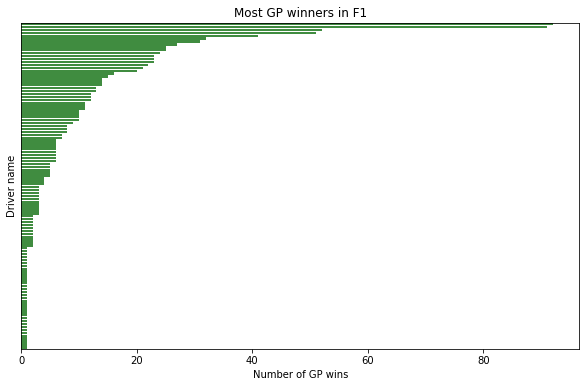

In [21]:
driver_winner = df2019.loc[df2019['position_order'] == 1].groupby('driver')['position_order'].count().sort_values(ascending=False).to_frame().reset_index()
sb.barplot(data=driver_winner, y='driver', x='position_order', color='green', alpha=0.8)
plt.title("Most GP winners in F1")
plt.ylabel("Driver name")
plt.xlabel("Number of GP wins")
plt.yticks([]);

In [22]:
top10Drivers = driver_winner.head(10)
print(top10Drivers)

               driver  position_order
0            hamilton              92
1  michael_schumacher              91
2              vettel              52
3               prost              51
4               senna              41
5              alonso              32
6             mansell              31
7             stewart              27
8               clark              25
9               lauda              25


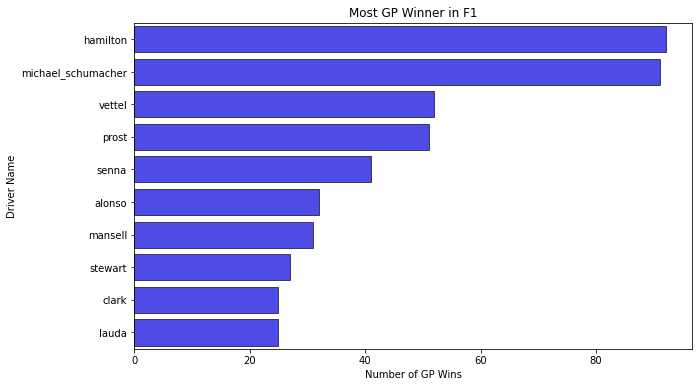

In [23]:
sb.barplot(data = top10Drivers, y = 'driver', x = 'position_order', color = 'blue', alpha = 0.8, linewidth = 0.8, edgecolor = 'black')
plt.title('Most GP Winner in F1')
plt.ylabel('Driver Name')
plt.xlabel('Number of GP Wins');

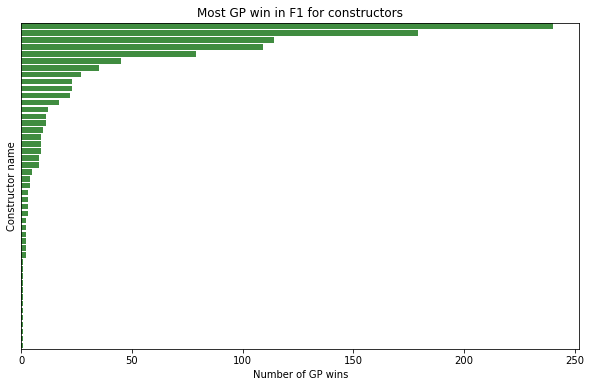

In [24]:
constructor_winner = df2019.loc[df2019['position_order'] == 1].groupby('constructor_name')['position_order'].count().sort_values(ascending=False).to_frame().reset_index()
sb.barplot(data=constructor_winner, y = 'constructor_name', x = 'position_order', color = 'green', alpha=0.8)
plt.title('Most GP win in F1 for constructors')
plt.ylabel('Constructor name')
plt.xlabel('Number of GP wins')
plt.yticks([]);

In [25]:
top10constructors = constructor_winner.head(10)

In [26]:
print(top10constructors)

  constructor_name  position_order
0          Ferrari             240
1          McLaren             179
2         Williams             114
3         Mercedes             109
4         Red Bull              79
5       Team Lotus              45
6          Renault              35
7         Benetton              27
8          Brabham              23
9          Tyrrell              23


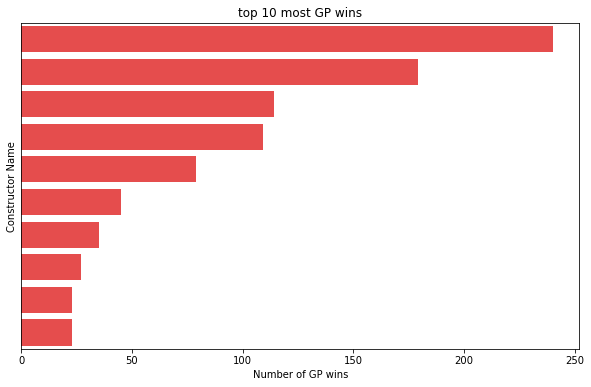

In [27]:
sb.barplot(data = top10constructors, y = 'constructor_name', x = 'position_order', color = 'red', alpha = 0.8)
plt.title('top 10 most GP wins')
plt.ylabel('Constructor Name')
plt.xlabel('Number of GP wins')
plt.yticks([]);


In [28]:
df2019.grid = df2019.grid.astype(int)

Text(0.5, 0, 'starting position')

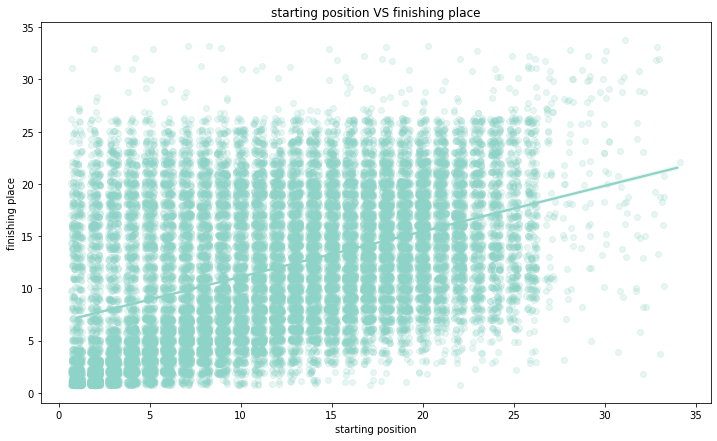

In [29]:
df2019_no_zero = df2019[df2019['grid'] != 0]

plt.figure(figsize = [12, 7])
sb.regplot(data = df2019_no_zero, x = 'grid', y = 'position_order', x_jitter = 0.3, y_jitter = 0.3, scatter_kws = {'alpha': 1/5});
plt.title('starting position VS finishing place')
plt.ylabel('finishing place')
plt.xlabel('starting position')

In [30]:
df2019.year = df2019.year.astype(int)

Text(0.5, 0.98, 'Average speed, all teams, during fastest lap, gps data')

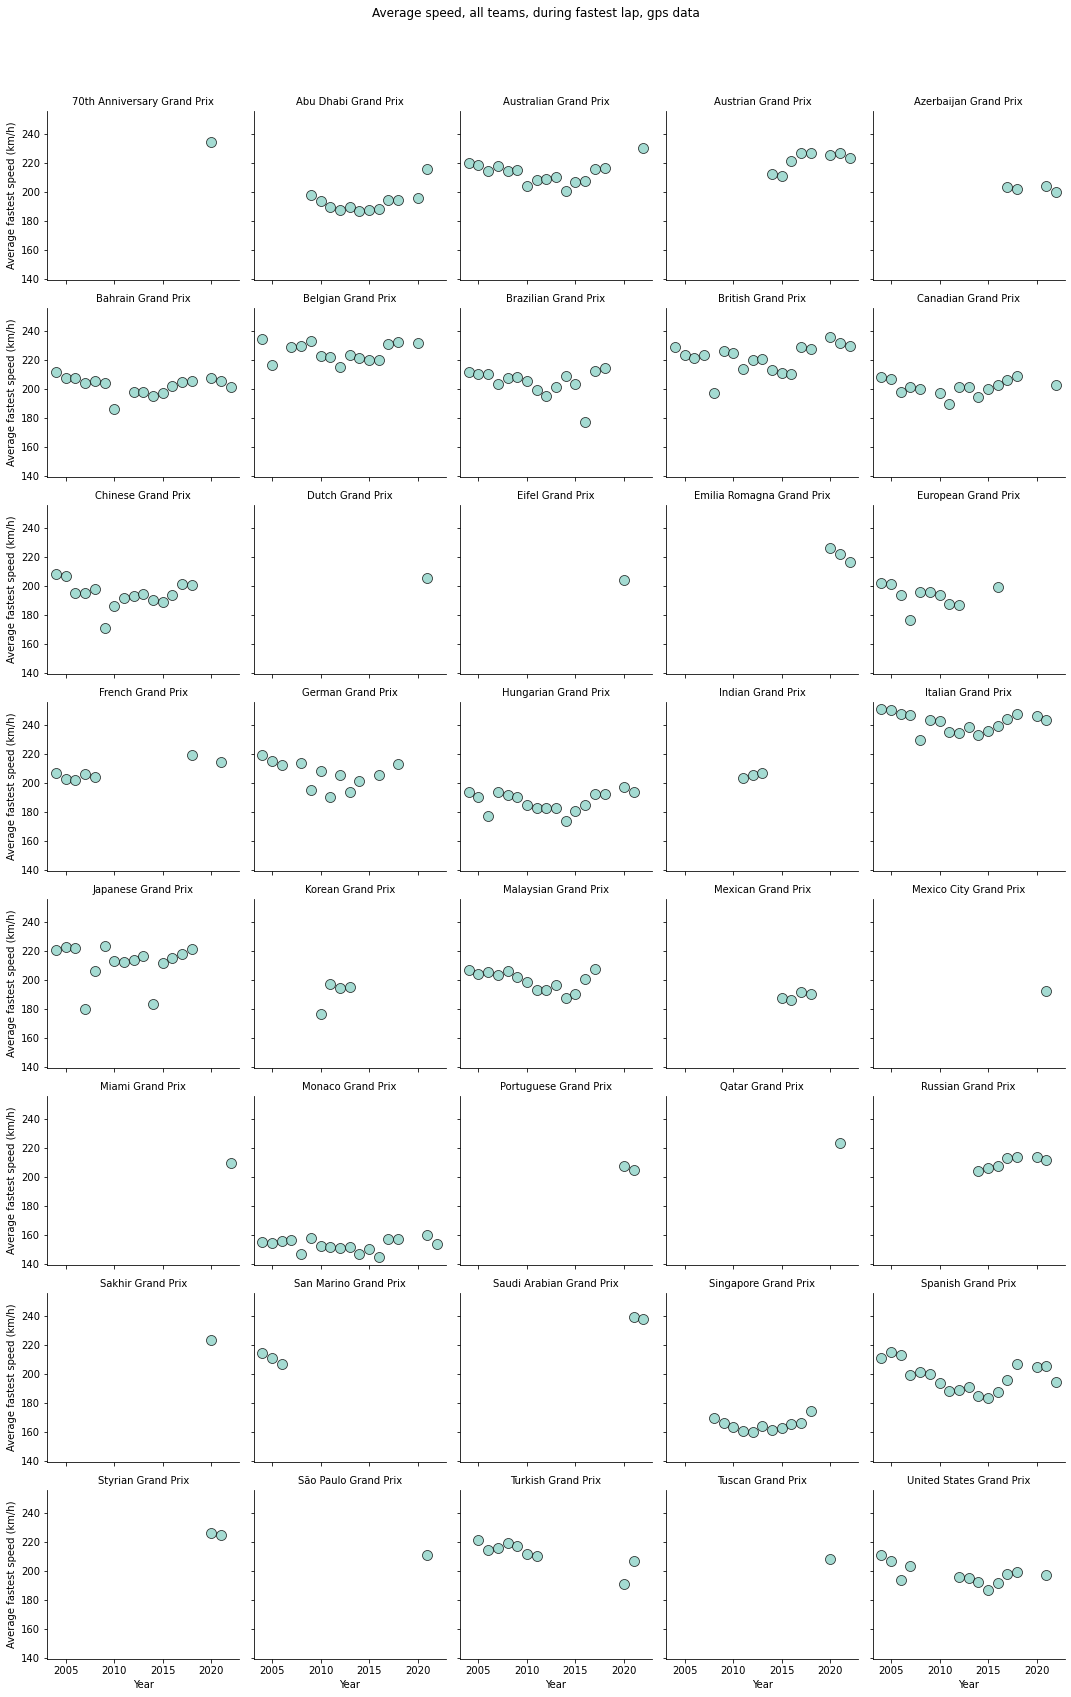

In [31]:
df2019_speed = df2019[df2019['year'] >= 2004]
df2019_group_speed = df2019_speed.groupby(['gp_name', 'year'])['fastest_lap_speed'].mean().to_frame().reset_index()

g = sb.FacetGrid(data = df2019_group_speed, col = 'gp_name', col_wrap = 5)
g.map(plt.scatter, 'year', 'fastest_lap_speed', alpha = 0.8, linewidth = .8, edgecolor = 'black', s = 100)
g.set_titles('{col_name}')
g.set_xlabels('Year')
g.set_ylabels('Average fastest speed (km/h)')
plt.subplots_adjust(top=0.92)
g.fig.suptitle('Average speed, all teams, during fastest lap, gps data')